In [2]:
from __future__ import division
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

In [6]:
data = pd.read_csv('nyc_airbnb/AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


C:\Users\Mary's PC\AppData\Local\Temp\ipykernel_16472\2715296889.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=test)


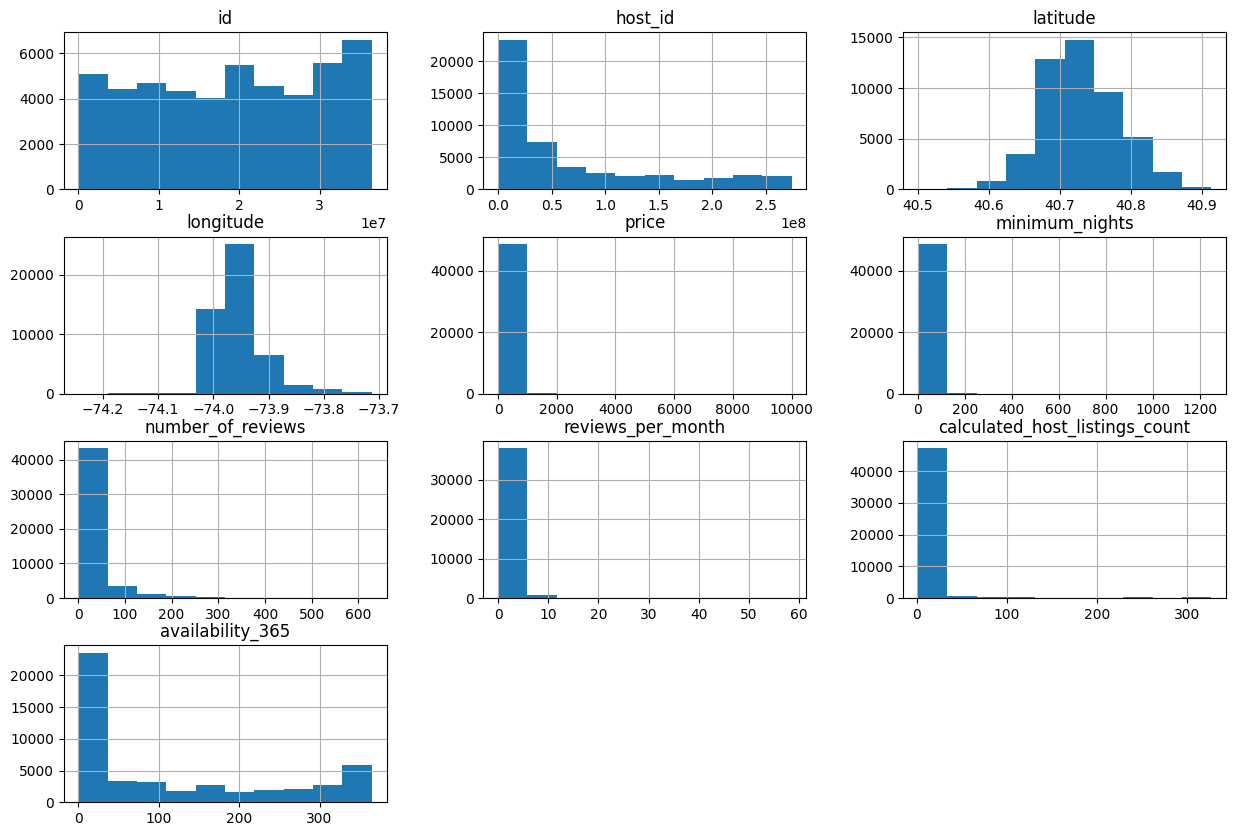

In [8]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
# confused about ax parameter
# This code works on six types of plots: pie, gistogram, boxplot, barplot, lineplot, scatterplot
fig = plt.figure(figsize = (15,10))
test = fig.gca()
data.hist(ax=test)
plt.show()

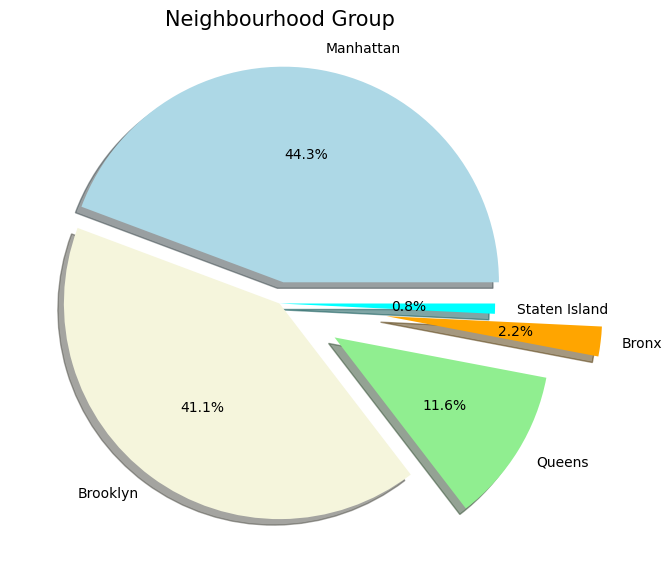

In [25]:
labels = data.neighbourhood_group.value_counts().index
colors = ['lightblue','beige','lightgreen','orange','cyan']
sizes = data.neighbourhood_group.value_counts().values


# print(data['neighbourhood_group'].value_counts().index)
# print(data['neighbourhood_group'].value_counts())

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=[0.1,0.0,0.3,0.5,0.0], labels=labels, colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Neighbourhood Group',color = 'black',fontsize = 15)
plt.show()

  neighbourhood_group  price
0               Bronx   65.0
3              Queens   75.0
4       Staten Island   75.0
1            Brooklyn   90.0
2           Manhattan  150.0


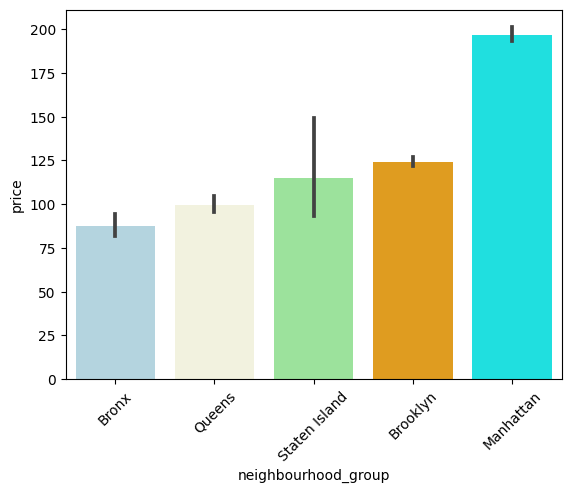

In [29]:
#neighbourhood_group-price
result = data.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
print(result)
# sns.barplot(x='neighbourhood_group', y="price", data=data,palette=colors)
sns.barplot(x='neighbourhood_group', y="price", data=data,palette=colors, order=result['neighbourhood_group']) 
plt.xticks(rotation=45)
plt.show()

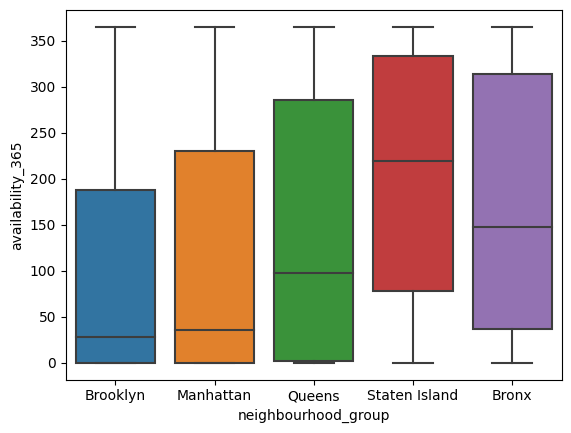

In [32]:
#neighbourhood_group-availability_365
sns.boxplot(x='neighbourhood_group', y="availability_365", data=data) 
plt.show()

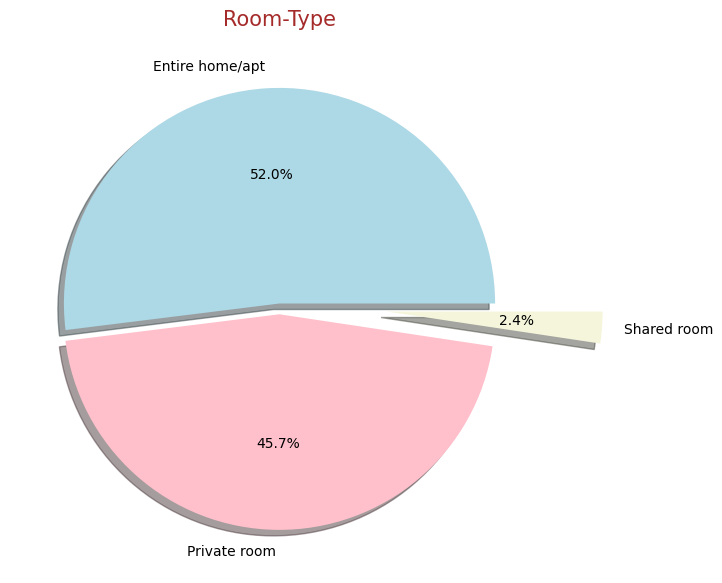

In [35]:
labels = data.room_type.value_counts().index
colors = ['lightblue','pink','beige']
sizes = data.room_type.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=[0,0.05,0.5], labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Room-Type',color = 'Brown',fontsize = 15)
plt.show()

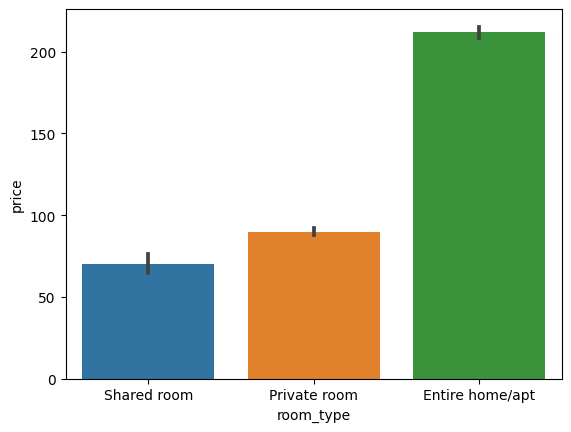

In [36]:
#room_type-price
result = data.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=data, order=result['room_type']) 
plt.show()

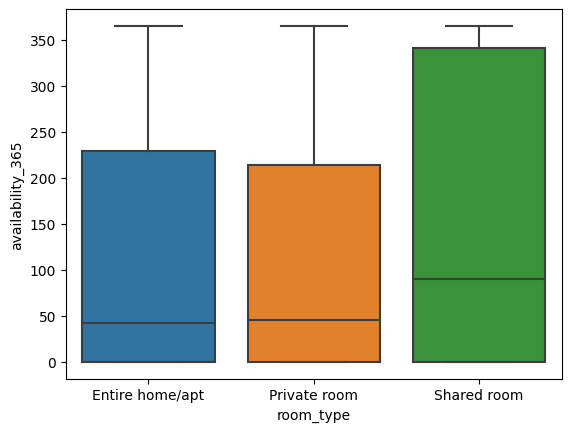

In [37]:
#room_type-availability_365
result = data.groupby(["room_type"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.boxplot(x='room_type', y="availability_365", data=data, order=result['room_type']) 
plt.show()

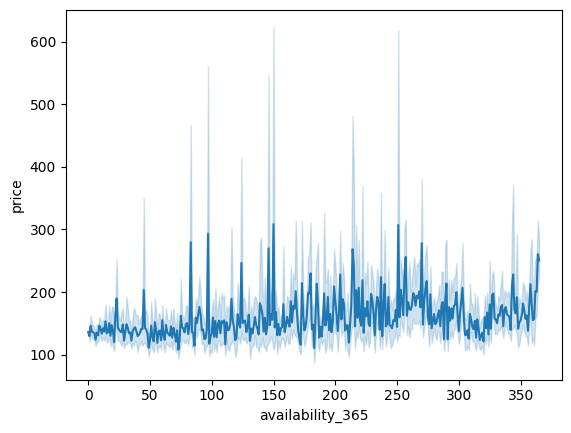

In [40]:
sns.lineplot(x='availability_365',y='price',data=data)
plt.show()

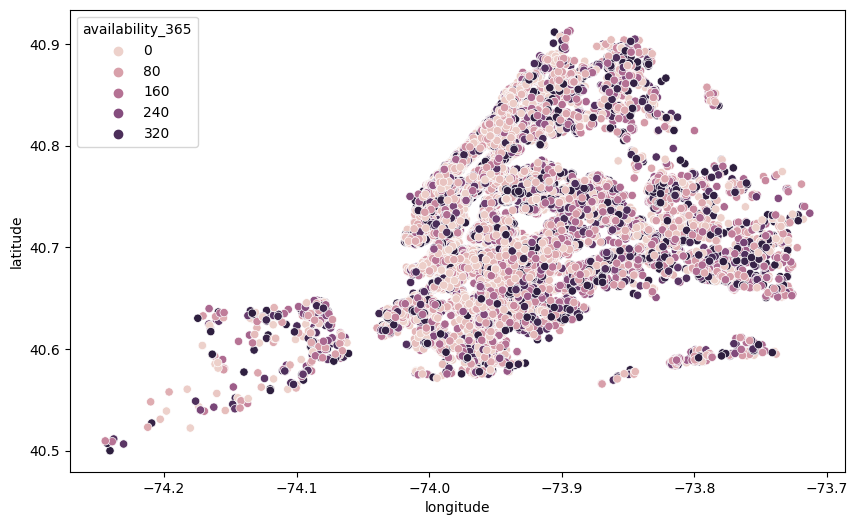

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.availability_365)
plt.ion()

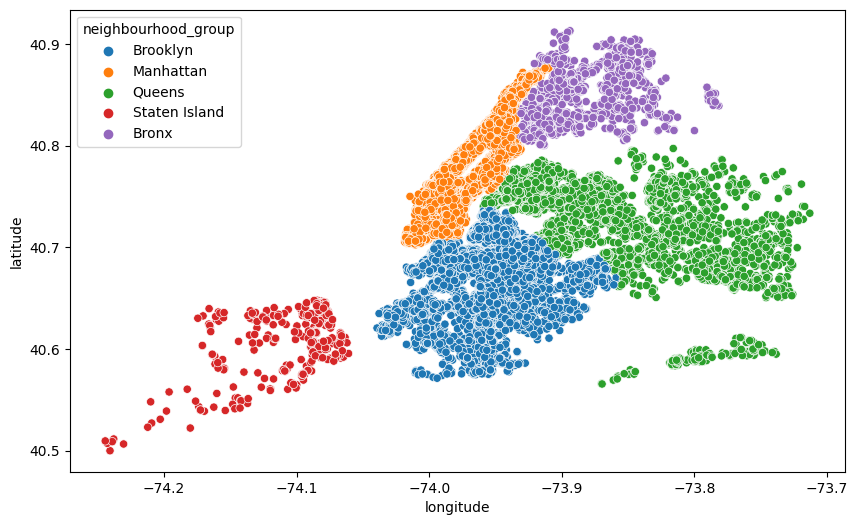

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.neighbourhood_group)
plt.ion()